## **i. Mount google drive**
---

In [142]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **ii. Import the libraries**
---

In [143]:
import cv2
import sys
import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

print("Versions of key libraries")
print("---")
print("cv2:       ", cv2.__version__)
print("numpy:     ", np.__version__)
print("matplotlib:", matplotlib.__version__)
print("pandas.   :", pd.__version__)

Versions of key libraries
---
cv2:        4.1.2
numpy:      1.19.5
matplotlib: 3.2.2
pandas.   : 1.1.5


## **iii. Append /iss/vse/data/ in your python path**
---

In [144]:
sys.path.append('/content/gdrive/My Drive/iss/vse/data/')
print("All the system paths:")
sys.path

All the system paths:


['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/iss/vse/data/',
 '/content/gdrive/My Drive/iss/vse/data/']

## **iv. Change working directory to /iss/vse/data/**
---

In [145]:
os.chdir('/content/gdrive/My Drive/iss/vse/data/')
print("Current working directory:")
os.getcwd()

Current working directory:


'/content/gdrive/My Drive/iss/vse/data'

## **v. Define `cv2plt` for image display**
---

In [146]:
def cv2plt(img):
    plt.figure(figsize=(7,7))        # To change the size of figure
    plt.axis('off')
    if np.size(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img,cmap='gray',vmin=0,vmax=255)  
    plt.show()

print(cv2plt)

<function cv2plt at 0x7fd507a7c560>


## **vi. Setup LeNet model**
---

In [147]:
lbl_file        = 'synset_words.txt'
labels          = open(lbl_file).read().strip().split("\n")
classes         = [r[r.find(" ") + 1:].split(",")[0] for r in labels]

                                                # Read in deep learning model
prototxt        = 'bvlc_googlenet.prototxt'
caffemodel      = 'bvlc_googlenet.caffemodel'
net             = cv2.dnn.readNetFromCaffe(prototxt, caffemodel)

pd.DataFrame(classes)                           # Display the first five and the last five classes

,0
0,tench
1,goldfish
2,great white shark
3,tiger shark
4,hammerhead
...,...
995,earthstar
996,hen-of-the-woods
997,bolete
998,ear


## **Question a**
---
Create a function that receives an image and returns the top 5 prediction. The function should have the below signature:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp;`def leNetPredict(img,scFactor=1,nrMean=(104,117,123),RBSwap=True):`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`...`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`return [Top5Classes,Top5Probability]`<br><br>


Read in the image '380.jpg' and use `leNet` to make top 5 prediction

In [148]:
# Type your code below
def leNetPredict(img,scFactor=1,nrMean=(104,117,123),RBSwap=True):

  # Create blob
  blob = cv2.dnn.blobFromImage(image=img, 
                              scalefactor=scFactor, 
                              size=(224, 224), 
                              mean=nrMean, 
                              swapRB=RBSwap, 
                              crop=True)
  
  # Set input and run the model
  net.setInput(blob)
  preds = net.forward()

  # Reduce the output into 1D array (preds[0]) and sort
  pr_idx = np.argsort(preds[0])
  pr_idx = pr_idx[::-1]
  
  # Final Output
  Top5Classes,Top5Probability=[],[]
  for i in range(5):
    Top5Classes.append(classes[pr_idx[i]])
    Top5Probability.append(preds[0,pr_idx[i]])
  
  return [Top5Classes,Top5Probability]

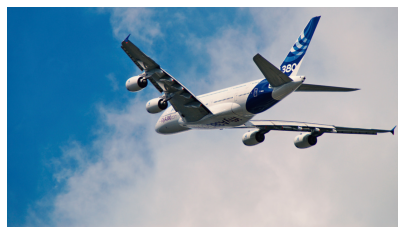

In [149]:
img = cv2.imread('380.jpg')
cv2plt(img)

In [150]:
Top5Classes,Top5Probability = leNetPredict(img)

In [151]:
for i,j in zip(Top5Classes,Top5Probability):
  print(i,'-->',j)

warplane --> 0.54781765
wing --> 0.3055288
airliner --> 0.07912236
space shuttle --> 0.042262178
rifle --> 0.0022249043


## **Question b**
---
Create a function that receives an image, `Top5Classes` and `Top5Probability` and produce the output in the below fasion.<br><br>
The name of the function should be `pltPredict`.

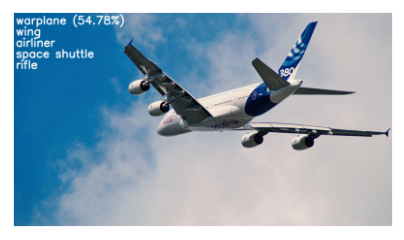

In [152]:
# Run the below to display the required output

cv2plt(cv2.imread('leNet-plane-output.png'))

In [153]:
# Type your code below

def pltPredict(image,Top5Classes,Top5Probability):
  img=image.copy()

  x = 3
  y = 30

  for i in range(5):
    if(i==0):
      imgtxt = Top5Classes[i] + " ({:.2f}%)".format(Top5Probability[i]* 100)
    else:
      imgtxt = Top5Classes[i]

    cv2.putText(img, 
                imgtxt, 
                (x,y), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                1, 
                (255, 255, 255), 
                2, 
                cv2.LINE_AA)
    
    y = y+30

  cv2plt(img)

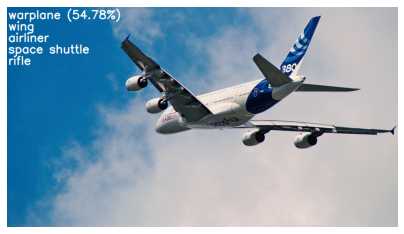

In [154]:
pltPredict(img,Top5Classes,Top5Probability)